#**Black Scholes Model - European Stock Options Pricing | Ticker - LON:AZN**

In [360]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [361]:
def euro_call_pricing(S, K, T, r, sigma):

    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)

    return call_price

In [362]:
def euro_put_pricing(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    put_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return put_price


In [363]:
Current_price = 12666.00
strike_price = 13000.00
Time_to_exp = 5/365  # 5 days
riskfree_intrest_rate = 0.0399
annual_volatility  = 0.2202 # sigma

call_pricing = euro_call_pricing(Current_price, strike_price, Time_to_exp, riskfree_intrest_rate, annual_volatility)



In [364]:
print(f"Call Option Price: {call_pricing:.2f}")


Call Option Price: 28.14


In [365]:
Current_price = 12666.00
strike_price = 12332.0
Time_to_exp = 5/365  # 5 days
riskfree_intrest_rate = 0.0399
annual_volatility  = 0.2202 # sigma

put_pricing = euro_put_pricing(Current_price, strike_price, Time_to_exp, riskfree_intrest_rate, annual_volatility)


In [366]:
print(f"Put Option Price: {put_pricing:.2f}")


Put Option Price: 23.99


## Dividend Adjusted Pricing

In [367]:


def div_euro_call_pricing(S, K, T, r, sigma, D=0):
    S_adj = S - D

    d1 = (math.log(S_adj / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    call_price = S_adj * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)

    return call_price




In [368]:
def div_euro_put_pricing(S, K, T, r, sigma, D=0):
    S_adj = S - D

    if S_adj <= 0:
        return max(K * math.exp(-r * T), 0)

    d1 = (math.log(S_adj / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    put_price = K * math.exp(-r * T) * norm.cdf(-d2) - S_adj * norm.cdf(-d1)

    return put_price

In [369]:
Current_price = 12666.00
strike_price = 12332.0
Time_to_exp = 5/365  # 5 days
riskfree_intrest_rate = 0.0399
annual_volatility  = 0.2202 # sigma
div_amount = 1.88  # 6 month div on LON:AZN

D = div_amount * math.exp(-riskfree_intrest_rate * Time_to_exp)

put_price = div_euro_put_pricing(Current_price, strike_price, Time_to_exp, riskfree_intrest_rate, annual_volatility, D )

print(f"Put Option Price: {put_price:.2f}")


Put Option Price: 24.26


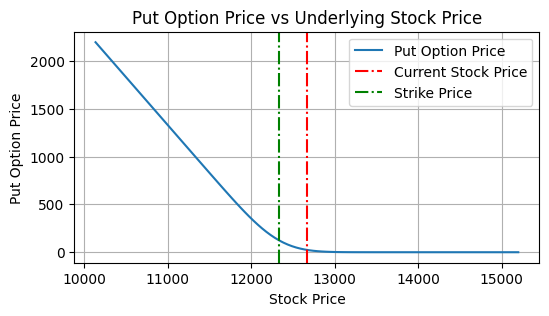

In [370]:
ula_price = np.linspace(Current_price * 0.8, Current_price * 1.2, 100)
option_price = [div_euro_put_pricing(S, strike_price, Time_to_exp, riskfree_intrest_rate, annual_volatility, D) for S in ula_price]
plt.figure(figsize=(6, 3))

plt.plot(ula_price, option_price, label='Put Option Price')

plt.axvline(x=Current_price, color='r', linestyle='dashdot', label='Current Stock Price')
plt.axvline(x=strike_price, color='g', linestyle='dashdot', label='Strike Price')

plt.title('Put Option Price vs Underlying Stock Price')
plt.xlabel('Stock Price')

plt.ylabel('Put Option Price')

plt.legend()

plt.grid(True)
current_option_price = div_euro_put_pricing(Current_price, strike_price, Time_to_exp, riskfree_intrest_rate, annual_volatility, D)



plt.show()


In [371]:
Current_price = 12666.00
strike_price = 13000.00
Time_to_exp = 5/365  # 5 days
riskfree_intrest_rate = 0.0399
annual_volatility  = 0.2202 # sigma

call_price = div_euro_call_pricing(Current_price, strike_price, Time_to_exp, riskfree_intrest_rate, annual_volatility, D )

In [372]:
print(f"Call Option Price: {call_price:.2f}")


Call Option Price: 27.83


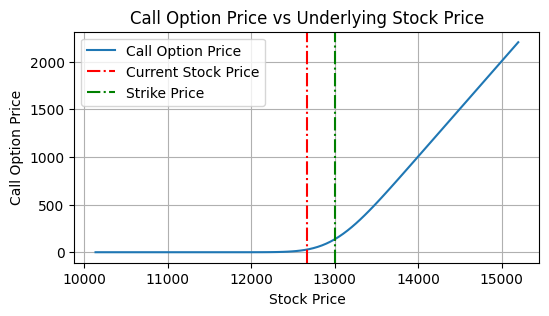

In [373]:
option_price = [div_euro_call_pricing(S, strike_price, Time_to_exp, riskfree_intrest_rate, annual_volatility, D) for S in ula_price]

plt.figure(figsize=(6, 3))

plt.plot(ula_price, option_price, label='Call Option Price')
plt.axvline(x=Current_price, color='r', linestyle='dashdot', label='Current Stock Price')

plt.axvline(x=strike_price, color='g', linestyle='dashdot', label='Strike Price')

plt.title('Call Option Price vs Underlying Stock Price')

plt.xlabel('Stock Price')
plt.ylabel('Call Option Price')

plt.legend()
plt.grid(True)

plt.show()